In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [9]:
# You can access from https://www.kaggle.com/uciml/german-credit
# Read input file and understand the data
# "default" is my dependent variable

df = pd.read_csv("german_credit.csv")
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [10]:
df.shape

(1000, 21)

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [7]:
from sklearn.model_selection import train_test_split

#We are taking 50% of data for use case

test_size = 0.50 # taking 50:50 training and test set and use one of this set as data for Use case
seed = 7  # Random numbmer seeding for reapeatability of the code
Data1, Data2, y_train, y_test = train_test_split(df, df, test_size=test_size, random_state=seed)


In [8]:
Data1.shape

(500, 21)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [11]:
# Print Shape of model data
Data1.shape

(500, 21)

### Check for highly correlated variables but don't required any treatment for this use case

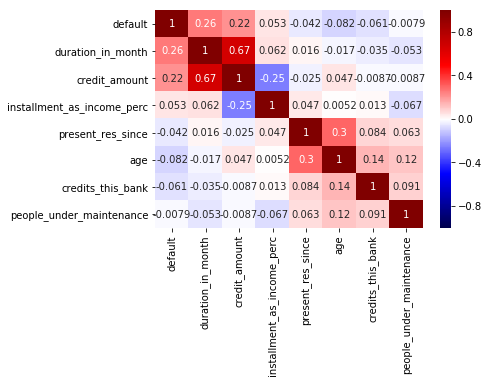

In [13]:
corr=Data1.corr()
sns.heatmap(corr, cmap='seismic', annot=True, vmax=1, vmin=-1)

#We see that credit_amount and duration_in_month are correlated. All other attributes are not much correlated.

### Drop the original variables which are converted to dummy

In [14]:
#converting non numeric to dummy and dropping original
data=pd.get_dummies(Data1,drop_first=True)
data.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
262,0,18,5302,2,4,36,3,1,1,0,...,1,1,0,0,0,0,0,0,1,1
457,1,12,3386,3,4,35,1,1,1,0,...,1,1,0,0,0,1,0,0,1,1
82,0,18,1568,3,4,24,1,1,0,0,...,0,1,0,0,1,0,0,1,0,1
563,1,36,12389,1,4,37,1,1,0,0,...,1,1,0,0,0,1,0,0,1,1
407,0,15,1053,4,2,27,1,1,1,0,...,0,1,0,1,0,1,0,0,0,0


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [16]:
Y=data['default'] #hold it in y as it is dependent
X=data.drop('default',axis=1) # dropping default as its not required variable


test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train, y_train)

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [31]:
from sklearn import metrics
y_predict = rfcl.predict(X_test)
print("Score : "+ str(metrics.accuracy_score(y_test, y_predict)))
print("Confusion Matrix : ")
print(metrics.confusion_matrix(y_test, y_predict))

Score : 0.7333333333333333
Confusion Matrix : 
[[98  5]
 [35 12]]


### Q6 Show the list of the features importance( 1 Marks)

In [32]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                                         Imp
duration_in_month                                   0.092313
credit_amount                                       0.125224
installment_as_income_perc                          0.041379
present_res_since                                   0.037270
age                                                 0.087226
credits_this_bank                                   0.021628
people_under_maintenance                            0.017597
account_check_status_< 0 DM                         0.028065
account_check_status_>= 200 DM / salary assignm...  0.010364
account_check_status_no checking account            0.062103
credit_history_critical account/ other credits ...  0.018578
credit_history_delay in paying off in the past      0.011144
credit_history_existing credits paid back duly ...  0.016623
credit_history_no credits taken/ all credits pa...  0.007775
purpose_business                                    0.010770
purpose_car (new)       

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [35]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [37]:
result = cross_val_score(rfcl, X_train, y_train, cv=num_folds)

In [0]:
#Calculate Mean score

In [38]:
result.mean()

0.76

In [0]:
# Calculate score standard deviation using std()

In [39]:
result.std()

0.044629998148038044

# Q8 Print the confusion matrix( 1 Marks)

In [41]:
y_predict = rfcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[98  5]
 [35 12]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [48]:
# Import the required libs
from sklearn.metrics import roc_curve, auc
#Precision and Recall
THRESHOLD = 0.42

preds = np.where(rfcl.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds,average=None),
                   precision_score(y_test, preds,average=None)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.766667
recall,"[0.8543689320388349, 0.574468085106383]"
precision,"[0.8148148148148148, 0.6428571428571429]"


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

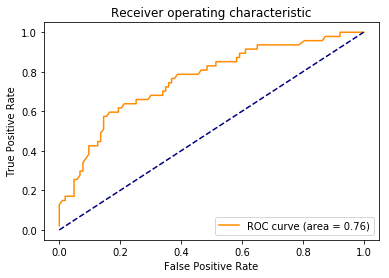

In [45]:
y_predictProb = rfcl.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [47]:
roc_auc = auc(fpr, tpr)
roc_auc

0.7606899400950218

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
